In [58]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,OrdinalEncoder,StandardScaler,MinMaxScaler

In [60]:
df=pd.read_csv('/content/drive/MyDrive/ICTAK_Notes/train_loan_preprocess.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [61]:
df.shape

(614, 13)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [63]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [64]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [65]:
df.LoanAmount.unique()

array([ nan, 128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70.,
       109., 200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315.,
       116., 112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320.,
       144., 184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97.,
       135., 180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187.,
       113., 176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,
        25., 137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,
        85., 259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242.,
       129.,  30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87.,
       101., 495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,
        90., 166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,
        42., 280., 140., 155., 123., 279., 192., 304., 330., 150., 207.,
       436.,  78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300.,
       376., 117.,  71., 490., 173.,  46., 228., 30

In [66]:
df.Credit_History.unique()

array([ 1.,  0., nan])

In [67]:
df.Self_Employed.unique()

array(['No', 'Yes', nan], dtype=object)

In [68]:
df.Dependents.unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [69]:
df['Dependents'].replace('3+',3,inplace=True)

In [70]:
#removing the unwanted columns
df.drop(columns=['Credit_History'],inplace=True)
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: xlabel='LoanAmount', ylabel='Count'>

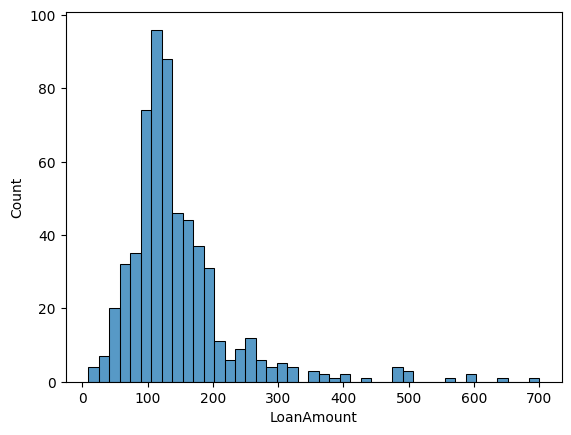

In [71]:
sns.histplot(df['LoanAmount'])

In [72]:
df['LoanAmount'].mode()

0    120.0
Name: LoanAmount, dtype: float64

In [73]:
df['LoanAmount'].fillna(df['LoanAmount'].mode()[0],inplace=True)

<Axes: xlabel='Self_Employed', ylabel='Count'>

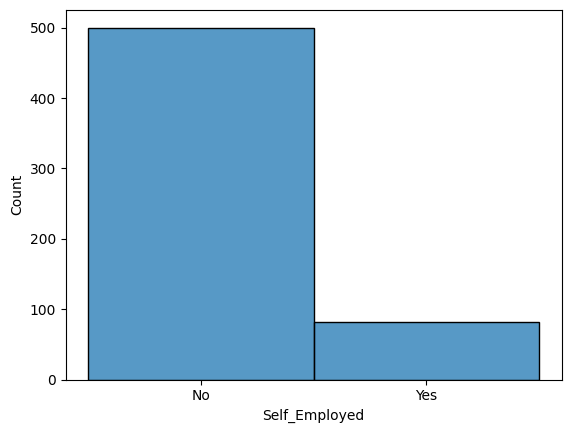

In [74]:
sns.histplot(df['Self_Employed'])

In [75]:
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)

In [76]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Property_Area         0
Loan_Status           0
dtype: int64

In [77]:
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)

<Axes: xlabel='Loan_Amount_Term', ylabel='Count'>

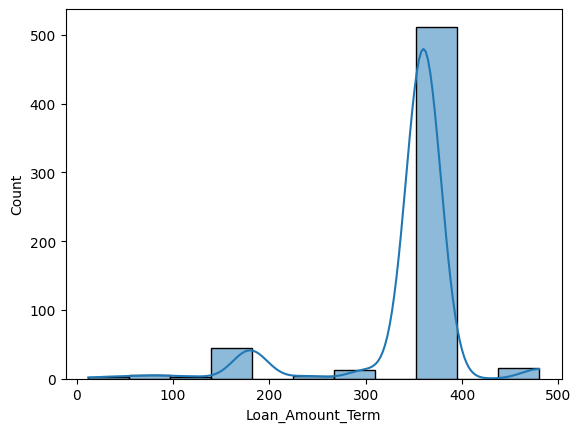

In [78]:
sns.histplot(df['Loan_Amount_Term'],kde=True)

In [79]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)

<Axes: xlabel='Gender', ylabel='Count'>

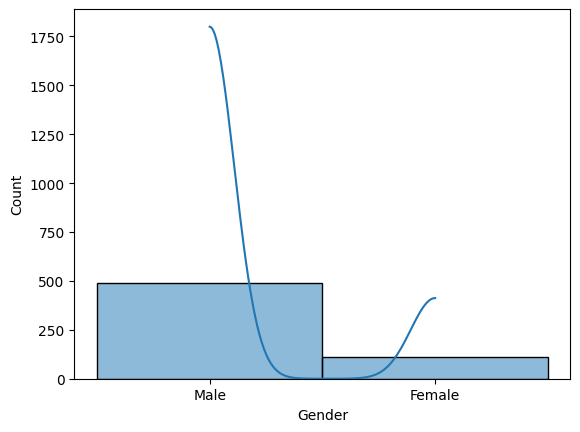

In [80]:
sns.histplot(df['Gender'],kde=True)

In [81]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)

<Axes: xlabel='Married', ylabel='Count'>

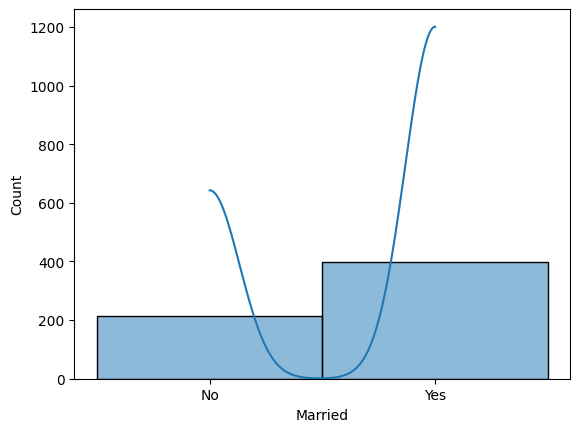

In [82]:
sns.histplot(df['Married'],kde=True)

In [83]:
df['Married'].fillna(df['Married'].mode()[0],inplace=True)

Detecting the outliers

In [84]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,Urban,Y


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(3), int64(1), object(8)
memory usage: 57.7+ KB


In [86]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Property_Area          3
Loan_Status            2
dtype: int64

In [87]:
columns_to_fill = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

{'whiskers': [<matplotlib.lines.Line2D at 0x7d635cb24a60>,
 'caps': [<matplotlib.lines.Line2D at 0x7d635cb25f00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d635cb241c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7d635cb26290>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d635c857880>],
 'means': []}

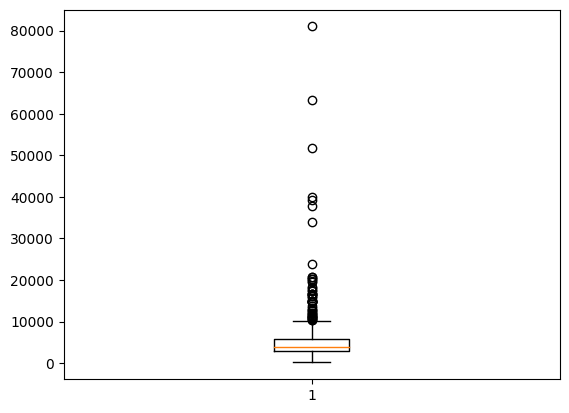

In [88]:
plot.boxplot(df['ApplicantIncome'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7d635c364eb0>,
 'caps': [<matplotlib.lines.Line2D at 0x7d635c3653f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d635c364d30>],
 'medians': [<matplotlib.lines.Line2D at 0x7d635c365930>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d635c365bd0>],
 'means': []}

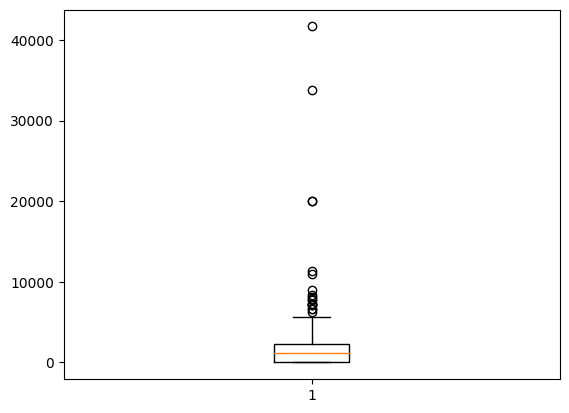

In [89]:
plot.boxplot(df['CoapplicantIncome'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7d635c3b71f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7d635c3b7730>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d635c3b6f50>],
 'medians': [<matplotlib.lines.Line2D at 0x7d635c3b7c70>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d635c3b7f10>],
 'means': []}

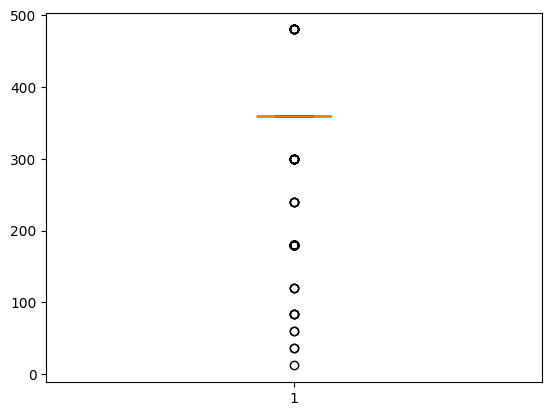

In [90]:
plot.boxplot(df['Loan_Amount_Term'])

Encoding

In [91]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,Urban,Y


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(3), int64(1), object(8)
memory usage: 57.7+ KB


In [93]:
categorical_columns = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
numerical_columns = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']

In [94]:
data_encoded=pd.get_dummies(df,columns=categorical_columns,dtype=int,drop_first=True)
data_encoded.head()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,LP001002,5849,0.0,120.0,360.0,1,0,1,0,0,0,0,0,1,1
1,LP001003,4583,1508.0,128.0,360.0,1,1,0,1,0,0,0,0,0,0
2,LP001005,3000,0.0,66.0,360.0,1,1,1,0,0,0,1,0,1,1
3,LP001006,2583,2358.0,120.0,360.0,1,1,1,0,0,1,0,0,1,1
4,LP001008,6000,0.0,141.0,360.0,1,0,1,0,0,0,0,0,1,1


In [95]:
data_encoded.drop(['Loan_ID'], axis = 1, inplace = True)

In [96]:
data_encoded.shape

(614, 14)

In [97]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          614 non-null    int64  
 1   CoapplicantIncome        614 non-null    float64
 2   LoanAmount               614 non-null    float64
 3   Loan_Amount_Term         614 non-null    float64
 4   Gender_Male              614 non-null    int64  
 5   Married_Yes              614 non-null    int64  
 6   Dependents_0             614 non-null    int64  
 7   Dependents_1             614 non-null    int64  
 8   Dependents_2             614 non-null    int64  
 9   Education_Not Graduate   614 non-null    int64  
 10  Self_Employed_Yes        614 non-null    int64  
 11  Property_Area_Semiurban  614 non-null    int64  
 12  Property_Area_Urban      614 non-null    int64  
 13  Loan_Status_Y            614 non-null    int64  
dtypes: float64(3), int64(11)
m

In [99]:
#standard Scaler (normal distribution data)
data_std_scaled=data_encoded.copy()

std_scaler=StandardScaler()
data_std_scaled[numerical_columns]=std_scaler.fit_transform(data_std_scaled[numerical_columns])
data_std_scaled.head()

KeyError: "['Credit_History'] not in index"

In [100]:
data_std_scaled.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.465798,342.410423,0.817590,0.653094,0.586319,0.166124,0.164495,0.218241,0.133550,0.379479,0.328990,0.687296
std,6109.041673,2926.248369,84.180967,64.428629,0.386497,0.476373,0.492894,0.372495,0.371027,0.413389,0.340446,0.485653,0.470229,0.463973
min,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3812.500000,1188.500000,125.000000,360.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [101]:
#Minmax scaler (skewed data)
data_minmax_scaled=data_encoded.copy()

minmax_scaler=MinMaxScaler()
data_minmax_scaled[numerical_columns]=std_scaler.fit_transform(data_minmax_scaled[numerical_columns])
data_minmax_scaled.head()

KeyError: "['Credit_History'] not in index"

In [ ]:
data_minmax_scaled.describe()

In [ ]:
#Correlation of orginal data data
corr_columns=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
orginal_data_cor=data_encoded[corr_columns].corr()
orginal_data_cor

In [ ]:
sns.heatmap(orginal_data_cor, annot=True)

In [ ]:
#Correlation of  data standard scaling
corr_columns=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
scaled_data_cor=data_std_scaled[corr_columns].corr()
scaled_data_cor

In [ ]:
sns.heatmap(scaled_data_cor, annot=True)

In [ ]:
#Correlation of  data Min max scaling
corr_columns=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
minmax_data_cor=data_minmax_scaled[corr_columns].corr()
minmax_data_cor

In [ ]:
sns.heatmap(minmax_data_cor, annot=True)